# Import the required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from six import StringIO # "from sklearn.internals.six import StrinIO" instead of this command the other command got executed. 
from IPython.display import Image # In Ipython, I and P both are in capital which was not the case previously as p of python was small.. 
from sklearn.tree import export_graphviz
import pydotplus # Before running this command, we ran the command "%pip install pydotplus", restarted the kernel as the output said and then ran the coommand.

# Read the Data from the CSV

In [12]:
dummy_df = pd.read_csv("C:/Users/Mohd idrees/bank.csv")

temp = dummy_df.columns.values
temp

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype=object)

In [13]:
dummy_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Data Processing

In [14]:
contact_df = dummy_df

In [18]:
def preprocessor (df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['day'] = le.fit_transform(res_df['day'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
                                        
    return res_df

In [19]:
encoded_df = preprocessor(contact_df)

x = encoded_df.drop(['deposit'], axis = 1).values
y = encoded_df['deposit'].values

# Split the Data into Train-Test

In [20]:
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.2)

# Build the Decision Tree Model

In [22]:
# Decision Tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_2.fit(x_train,y_train)
model_dt_2.score_train = model_dt_2.score(x_train,y_train)
print("Trainig Score: ", model_dt_2.score_train)
model_dt_2.score_test = model_dt_2.score(x_test,y_test)
print("Testing Score: ", model_dt_2.score_test)
      

Trainig Score:  0.7132937618994288
Testing Score:  0.703090013434841


In [23]:
# Decision Tree with depth = 4
model_dt_4 = DecisionTreeClassifier(random_state=1, max_depth=4)
model_dt_4.fit(x_train,y_train)
model_dt_4.score_train = model_dt_4.score(x_train,y_train)
print("Training Score: ", model_dt_4.score_train)
model_dt_4.score_test = model_dt_4.score(x_test,y_test)
print("Testing Score: ", model_dt_4.score_test)


Training Score:  0.7919139881285698
Testing Score:  0.7756381549484997


In [50]:
# Decision Tree with depth = 6
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=6, criterion="gini")
model_dt_8.fit(x_train,y_train)
model_dt_8.score_train = model_dt_8.score(x_train,y_train)
print("Training Score: ", model_dt_8.score_train)
model_dt_8.score_test = model_dt_8.score(x_test,y_test)
print("Testing Score: ", model_dt_8.score_test)


Training Score:  0.8203606226901109
Testing Score:  0.7989252127183162


In [51]:
# Decision Tree with depth = 8
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion="gini")
model_dt_8.fit(x_train,y_train)
model_dt_8.score_train = model_dt_8.score(x_train,y_train)
print("Training Score: ", model_dt_8.score_train)
model_dt_8.score_test = model_dt_8.score(x_test,y_test)
print("Testing Score: ", model_dt_8.score_test)


Training Score:  0.8481352895061037
Testing Score:  0.8025078369905956


In [53]:
# Decision Tree with depth = 10
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=10, criterion="gini")
model_dt_8.fit(x_train,y_train)
model_dt_8.score_train = model_dt_8.score(x_train,y_train)
print("Training Score: ", model_dt_8.score_train)
model_dt_8.score_test = model_dt_8.score(x_test,y_test)
print("Testing Score: ", model_dt_8.score_test)


Training Score:  0.8846455370142233
Testing Score:  0.8047469771607703


In [26]:
# Decision Tree

model_dt = DecisionTreeClassifier(max_depth=8, criterion='entropy')
model_dt.fit(x_train,y_train)
y_pred_dt = model_dt.predict_proba(x_test)[:,1]

# Performance Metrics

In [27]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [28]:
predictions = model_dt.predict(x_test)
predictions

array([1, 0, 0, ..., 0, 1, 0])

In [39]:
y_actual_result = 0

for i in range(len(predictions)):
    if (predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

# Recall

In [40]:
# Recall

y_actual_result = y_actual_result.flatten()
count = 0 

for result in y_actual_result:
    if (result == 1):
        count+=1
        
print("true yes | predicted yes:")
print(count/float(len(y_actual_result)))
    
    

true yes | predicted yes:
0.8041749502982107


# Area under the curve

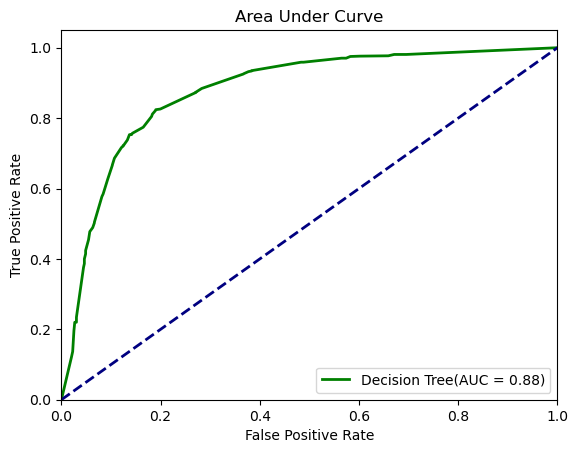

In [41]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color = 'green',
         lw = lw, label = 'Decision Tree(AUC = %0.2f)' % roc_auc_dt)

plt.plot([0,1], [0,1], color = 'navy', lw = lw, linestyle = '--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc = 'lower right')
plt.show()

# Confusion Matrix

In [42]:
print(confusion_matrix(y_test, predictions))

[[992 196]
 [236 809]]


In [43]:
accuracy_score(y_test,predictions)

0.80653828929691

In [44]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

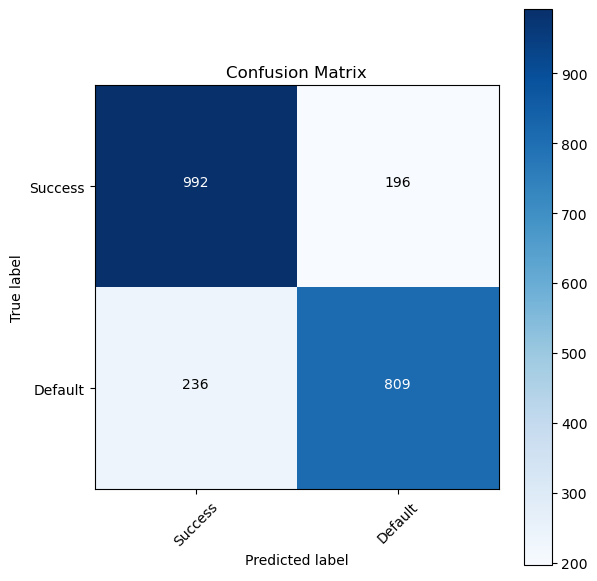

In [45]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()